In [1]:
#Open the datasets

import json
import os

#The dataset collected in January 2023

file_path_jan = os.path.join('..', 'dataset','Compiled', 'Jan', 'dataset_compiled_jan.json')
with open(file_path_jan) as result_jan:
    result_jan = json.load(result_jan)
    
#The dataset collected in April 2023    
    
file_path_apr = os.path.join('..', 'dataset','Compiled', 'Apr', 'dataset_compiled_apr.json')
with open(file_path_apr) as result_apr:
    result_apr = json.load(result_apr)

#The dataset collected in September 2023

file_path_sep = os.path.join('..', 'dataset','Compiled', 'Sep','dataset_compiled_sep.json')
with open(file_path_sep) as result_sep:
    result_sep = json.load(result_sep)


In [2]:
# Clean the result from dictionaries with missing 'itemList' - object containing our data

result_jan = [v for v in result_jan if 'itemList' in v and v['itemList']]

result_apr = [v for v in result_apr if 'itemList' in v and v['itemList']]

result_sep = [v for v in result_sep if 'itemList' in v and v['itemList']]

In [3]:
#Pretty print, check the structure of the object

from pprint import pprint
pprint(result_sep[1]['itemList'])

[{'BAInfo': '',
  'adAuthorization': False,
  'adLabelVersion': 0,
  'author': {'avatarLarger': 'https://p16-sign-va.tiktokcdn.com/tos-maliva-avt-0068/043f3995f78f43394bd008a8cc7cc00c~c5_1080x1080.jpeg?x-expires=1696150800&x-signature=MLgY16EJWlZOolZr8GlSwlSFhy0%3D',
             'avatarMedium': 'https://p16-sign-va.tiktokcdn.com/tos-maliva-avt-0068/043f3995f78f43394bd008a8cc7cc00c~c5_720x720.jpeg?x-expires=1696150800&x-signature=17kLhMTmtld0nV%2F%2Fzf7sTyBfcSE%3D',
             'avatarThumb': 'https://p16-sign-va.tiktokcdn.com/tos-maliva-avt-0068/043f3995f78f43394bd008a8cc7cc00c~c5_100x100.jpeg?x-expires=1696150800&x-signature=0Gddu89qpzlPrDYaDzAT4Ny%2FVAw%3D',
             'commentSetting': 0,
             'downloadSetting': 3,
             'duetSetting': 0,
             'ftc': False,
             'id': '6764546377709241350',
             'isADVirtual': False,
             'isEmbedBanned': False,
             'nickname': 'Offff😝',
             'openFavorite': False,
             'pri

                  'profileLarger': '',
                  'profileMedium': '',
                  'profileThumb': '',
                  'stats': {'videoCount': 0, 'viewCount': 0},
                  'title': 'successtips'},
                 {'coverLarger': '',
                  'coverMedium': '',
                  'coverThumb': '',
                  'desc': '',
                  'id': '14975251',
                  'isCommerce': False,
                  'profileLarger': '',
                  'profileMedium': '',
                  'profileThumb': '',
                  'stats': {'videoCount': 0, 'viewCount': 0},
                  'title': 'digitalnomad'},
                 {'coverLarger': '',
                  'coverMedium': '',
                  'coverThumb': '',
                  'desc': '',
                  'id': '1612963776839686',
                  'isCommerce': False,
                  'profileLarger': '',
                  'profileMedium': '',
                  'profileThumb': '',
   

                  'profileMedium': '',
                  'profileThumb': '',
                  'stats': {'videoCount': 0, 'viewCount': 0},
                  'title': 'baliitinerary'},
                 {'coverLarger': '',
                  'coverMedium': '',
                  'coverThumb': '',
                  'desc': 'Love food? Show us your favorite dishes and '
                          'recipes.',
                  'id': '251048',
                  'isCommerce': False,
                  'profileLarger': 'https://p16-amd-va.tiktokcdn.com/obj/musically-maliva-obj/c6cae408e992316b525724a22e160516.png',
                  'profileMedium': 'https://p16-amd-va.tiktokcdn.com/obj/musically-maliva-obj/c6cae408e992316b525724a22e160516.png',
                  'profileThumb': 'https://p16-amd-va.tiktokcdn.com/obj/musically-maliva-obj/c6cae408e992316b525724a22e160516.png',
                  'stats': {'videoCount': 0, 'viewCount': 0},
                  'title': 'Foodie'},
                 {'cover

                               'start': 132,
                               'subType': 0,
                               'type': 1,
                               'userId': '',
                               'userUniqueId': ''},
                              {'awemeId': '',
                               'end': 150,
                               'hashtagId': '50698',
                               'hashtagName': 'utah',
                               'isCommerce': False,
                               'secUid': '',
                               'start': 145,
                               'subType': 0,
                               'type': 1,
                               'userId': '',
                               'userUniqueId': ''}]}],
  'createTime': 1615424349,
  'desc': 'WISH you could travel FULL TIME?!Click on the link in my bio for '
          'remote jobs! #travel #teachandtravel #digitalnomad #fulltimetravel '
          '#travelbuddy #utah',
  'digged': False,
  'divers

                  'desc': '',
                  'id': '14975251',
                  'isCommerce': False,
                  'profileLarger': '',
                  'profileMedium': '',
                  'profileThumb': '',
                  'stats': {'videoCount': 0, 'viewCount': 0},
                  'title': 'digitalnomad'},
                 {'coverLarger': '',
                  'coverMedium': '',
                  'coverThumb': '',
                  'desc': '',
                  'id': '1635803243660294',
                  'isCommerce': False,
                  'profileLarger': '',
                  'profileMedium': '',
                  'profileThumb': '',
                  'stats': {'videoCount': 0, 'viewCount': 0},
                  'title': 'fulltimetravel'},
                 {'coverLarger': '',
                  'coverMedium': '',
                  'coverThumb': '',
                  'desc': '',
                  'id': '4274401',
                  'isCommerce': False,
            

            'duration': 0,
            'id': '6878320258902493958',
            'original': False,
            'playUrl': '',
            'title': ''},
  'officalItem': False,
  'originalItem': False,
  'playlistId': '',
  'privateItem': False,
  'secret': False,
  'shareEnabled': True,
  'showNotPass': False,
  'stats': {'collectCount': 8274,
            'commentCount': 1426,
            'diggCount': 283500,
            'playCount': 3700000,
            'shareCount': 7468},
  'stickersOnItem': [{'stickerText': ['When lamborghini said we don’t do '
                                      'commercials ',
                                      'Cause our target audience isn’t sitting '
                                      'around watching tv..',
                                      'That hit me'],
                      'stickerType': 4}],
  'stitchDisplay': 0,
  'stitchEnabled': True,
  'textExtra': [{'awemeId': '',
                 'end': 36,
                 'hashtagId': '77593787',
   

                  'profileLarger': '',
                  'profileMedium': '',
                  'profileThumb': '',
                  'stats': {'videoCount': 0, 'viewCount': 0},
                  'title': 'workabroad'},
                 {'coverLarger': '',
                  'coverMedium': '',
                  'coverThumb': '',
                  'desc': '',
                  'id': '1597797127602182',
                  'isCommerce': False,
                  'profileLarger': '',
                  'profileMedium': '',
                  'profileThumb': '',
                  'stats': {'videoCount': 0, 'viewCount': 0},
                  'title': 'travelinfluencer'},
                 {'coverLarger': '',
                  'coverMedium': '',
                  'coverThumb': '',
                  'desc': '',
                  'id': '1614697096609798',
                  'isCommerce': False,
                  'profileLarger': '',
                  'profileMedium': '',
                  'profileThum

                 'hashtagId': '73062343',
                 'hashtagName': 'workabroad',
                 'isCommerce': False,
                 'secUid': '',
                 'start': 159,
                 'subType': 0,
                 'type': 1,
                 'userId': '',
                 'userUniqueId': ''},
                {'awemeId': '',
                 'end': 188,
                 'hashtagId': '1597797127602182',
                 'hashtagName': 'travelinfluencer',
                 'isCommerce': False,
                 'secUid': '',
                 'start': 171,
                 'subType': 0,
                 'type': 1,
                 'userId': '',
                 'userUniqueId': ''},
                {'awemeId': '',
                 'end': 202,
                 'hashtagId': '1614697096609798',
                 'hashtagName': 'worldpackers',
                 'isCommerce': False,
                 'secUid': '',
                 'start': 189,
                 'subType': 0,
   

  'contents': [{'desc': 'a realistic cost breakdown of how much it costs to '
                        'live in the caribbean island of aruba for one month '
                        '🌺🌴✈️ we found it to be pretty comparable to the cost '
                        'of living in curacao last month + to any major US '
                        'city! #whatispendinamonth #costbreakdown '
                        '#costofliving #caribbeancostbreakdown '
                        '#arubacostofliving #rent #backpacking #aruba #curacao '
                        '#caribbean #southamerica #adventure #backpackinglife '
                        '#traveltok #traveldiaries #digitalnomad '
                        '#workingremotely #traveltheworld #workandtravel '
                        '#remotework #9to5life #workfromeverywhere #travel '
                        '#aesthetic #beach #ocean ',
                'textExtra': [{'awemeId': '',
                               'end': 233,
                               

                 'hashtagName': 'wanderlust',
                 'isCommerce': False,
                 'secUid': '',
                 'start': 54,
                 'subType': 0,
                 'type': 1,
                 'userId': '',
                 'userUniqueId': ''},
                {'awemeId': '',
                 'end': 82,
                 'hashtagId': '1646825497982981',
                 'hashtagName': 'blackgirltiktok',
                 'isCommerce': False,
                 'secUid': '',
                 'start': 66,
                 'subType': 0,
                 'type': 1,
                 'userId': '',
                 'userUniqueId': ''},
                {'awemeId': '',
                 'end': 96,
                 'hashtagId': '1598183468378114',
                 'hashtagName': 'traveltiktok',
                 'isCommerce': False,
                 'secUid': '',
                 'start': 83,
                 'subType': 0,
                 'type': 1,
                 'userI

                 {'coverLarger': 'https://p16-amd-va.tiktokcdn.com/obj/musically-maliva-obj/fd482e57f08cc6a9398591c9e8b63c04',
                  'coverMedium': 'https://p16-amd-va.tiktokcdn.com/obj/musically-maliva-obj/fd482e57f08cc6a9398591c9e8b63c04',
                  'coverThumb': 'https://p16-amd-va.tiktokcdn.com/obj/musically-maliva-obj/fd482e57f08cc6a9398591c9e8b63c04',
                  'desc': "Whether you want to go back, or you're planning the "
                          'trip of a lifetime, show us those places on your '
                          '#TravelBucketList.',
                  'id': '1630643238159365',
                  'isCommerce': False,
                  'profileLarger': 'https://p16-amd-va.tiktokcdn.com/obj/musically-maliva-obj/00afe79db8bc737c79a90edfb1eb64ba',
                  'profileMedium': 'https://p16-amd-va.tiktokcdn.com/obj/musically-maliva-obj/00afe79db8bc737c79a90edfb1eb64ba',
                  'profileThumb': 'https://p16-amd-va.tiktokcdn.com/obj/

            'original': True,
            'playUrl': 'https://v58.tiktokcdn.com/video/tos/useast2a/tos-useast2a-v-27dcd7/69e98ad071794cc799ef267dba793aa7/?a=1233&ch=0&cr=0&dr=0&er=2&cd=0%7C0%7C0%7C0&br=250&bt=125&bti=NDU3ZjAwOg%3D%3D&ft=d2A~l-Inz7TPqmwZiyq8Z&mime_type=audio_mpeg&qs=6&rc=Nmc3NDdmaDlpOTtkPDw3Z0BpajdxOWc6ZmR3ZTMzNzU8M0AtYDZfYDY0X2AxX19fYTI1YSM1cTFfcjRfMl9gLS1kMTZzcw%3D%3D&l=20230929092130A1EE2E2D9C97081C7F2D&VExpiration=1696000925&VSignature=bODd5shk8NTQay6k64AK1g&btag=e00088000&cc=14&download=true',
            'title': 'original sound'},
  'officalItem': False,
  'originalItem': False,
  'playlistId': '',
  'privateItem': False,
  'secret': False,
  'shareEnabled': True,
  'showNotPass': False,
  'stats': {'collectCount': 7865,
            'commentCount': 1470,
            'diggCount': 251800,
            'playCount': 3500000,
            'shareCount': 2204},
  'stickersOnItem': [{'stickerText': ['When you’re too hungover for work'],
                      'stickerType':

                 'hashtagName': 'emprendimiento',
                 'isCommerce': False,
                 'secUid': '',
                 'start': 74,
                 'subType': 0,
                 'type': 1,
                 'userId': '',
                 'userUniqueId': ''}],
  'video': {'bitrate': 1106581,
            'bitrateInfo': [{'Bitrate': 1106581,
                             'CodecType': 'h264',
                             'GearName': 'normal_540_0',
                             'PlayAddr': {'DataSize': 2106654,
                                          'FileCs': 'c:0-13640-db12',
                                          'FileHash': '5cb3255c6aae72f1398c21c8ea6fa28f',
                                          'Uri': 'v09044g40000c4trh8jc77u0so570h30',
                                          'UrlKey': 'v09044g40000c4trh8jc77u0so570h30_h264_540p_1106581',
                                          'UrlList': ['https://v16-webapp-prime.tiktok.com/video/tos/useast2a/tos-useast

                          "garage, here's to each and every "
                          '#SmallBusinessOwner.',
                  'id': '70509662',
                  'isCommerce': False,
                  'profileLarger': 'https://p16-amd-va.tiktokcdn.com/obj/musically-maliva-obj/b6897133282041d2f3f29866d159de9b',
                  'profileMedium': 'https://p16-amd-va.tiktokcdn.com/obj/musically-maliva-obj/b6897133282041d2f3f29866d159de9b',
                  'profileThumb': 'https://p16-amd-va.tiktokcdn.com/obj/musically-maliva-obj/b6897133282041d2f3f29866d159de9b',
                  'stats': {'videoCount': 0, 'viewCount': 0},
                  'title': 'smallbusinessowner'},
                 {'coverLarger': '',
                  'coverMedium': '',
                  'coverThumb': '',
                  'desc': '',
                  'id': '4597735',
                  'isCommerce': False,
                  'profileLarger': '',
                  'profileMedium': '',
                  'prof

                               'VideoSubtitleID': 1988324730},
                              {'Format': 'webvtt',
                               'LanguageCodeName': 'por-PT',
                               'LanguageID': '8',
                               'Size': 7353,
                               'Source': 'MT',
                               'Url': 'https://v16-webapp.tiktok.com/59d20ec614a7fd1a477fb66864820405/65193adc/video/tos/useast2a/tos-useast2a-v-0068/d988c280ac014fa78569fe1ac2bc385a/?a=1988&ch=0&cr=3&dr=0&lr=unwatermarked&cd=0%7C0%7C0%7C3&cv=1&br=61614&bt=30807&bti=NDU3ZjAwOg%3D%3D&ft=_GC~MBNXq8Zmoxj95Q_vj4Ha8AhLrus&mime_type=video_mp4&qs=13&rc=MzRscTg6ZnBmajMzNzgzM0BpMzRscTg6ZnBmajMzNzgzM0BgYWhycjRvbm1gLS1kLzZzYSNgYWhycjRvbm1gLS1kLzZzcw%3D%3D&l=20230929092130A1EE2E2D9C97081C7F2D&btag=e00058000',
                               'UrlExpire': 1696152284,
                               'Version': '4',
                               'VideoSubtitleID': 1629885706},
              

                               'userId': '',
                               'userUniqueId': ''},
                              {'awemeId': '',
                               'end': 195,
                               'hashtagId': '33482446',
                               'hashtagName': 'workandtravel',
                               'isCommerce': False,
                               'secUid': '',
                               'start': 181,
                               'subType': 0,
                               'type': 1,
                               'userId': '',
                               'userUniqueId': ''},
                              {'awemeId': '',
                               'end': 207,
                               'hashtagId': '77593787',
                               'hashtagName': 'remotework',
                               'isCommerce': False,
                               'secUid': '',
                               'start': 196,
                      

In [13]:
#expanding nestled dictionaries for all three datasets

extended_list_jan = []
extended_list_apr = []
extended_list_sep = []
for i, v in enumerate(result_jan):
    itemlist_jan = v.get('itemList')
    if itemlist_jan:
        extended_list_jan.extend(itemlist_jan)
    else:
        print(f'itemlist missing: {i}')

for i, v in enumerate(result_apr):
    itemlist_apr = v.get('itemList')
    if itemlist_apr:
        extended_list_apr.extend(itemlist_apr)
    else:
        print(f'itemlist missing: {i}')  
        

for i, v in enumerate(result_sep):
    itemlist_sep = v.get('itemList')
    if itemlist_sep:
        extended_list_sep.extend(itemlist_sep)
    else:
        print(f'itemlist missing: {i}')          
        
#creating a non-expiring link the the video
videolink_jan = ['https://www.tiktok.com/@'+v['author']['id']+'/video/'+ v['video']['id'] for v in extended_list_jan]
videolink_apr = ['https://www.tiktok.com/@'+v['author']['id']+'/video/'+ v['video']['id'] for v in extended_list_apr]
videolink_sep = ['https://www.tiktok.com/@'+v['author']['id']+'/video/'+ v['video']['id'] for v in extended_list_sep]

#expanding video dictionary
video_object_jan = [v['video'] for v in extended_list_jan]
video_object_apr = [v['video'] for v in extended_list_apr]
video_object_sep = [v['video'] for v in extended_list_sep]



In [46]:
#Expanding StickerOnItme on the video in all three datasets

StickerOnItem_jan = []
for v in extended_list_jan:
    if 'stickersOnItem' in v:
        StickerOnItem_jan.append(v['stickersOnItem'])
    else:
        StickerOnItem_jan.append([])  # Append an empty list if the key doesn't exist
        
StickerOnItem_apr = []
for v in extended_list_apr:
    if 'stickersOnItem' in v:
        StickerOnItem_apr.append(v['stickersOnItem'])
    else:
        StickerOnItem_apr.append([])  # Append an empty list if the key doesn't exist
        
StickerOnItem_sep = []
for v in extended_list_sep:
    if 'stickersOnItem' in v:
        StickerOnItem_sep.append(v['stickersOnItem'])
    else:
        StickerOnItem_sep.append([])  # Append an empty list if the key doesn't exist        
        


In [49]:
#Creating a dataframe for stickerOnItem for the dataset collected in January

StickerOnItem_jan = []

for v in extended_list_jan:
    if 'stickersOnItem' in v:
        for sticker in v['stickersOnItem']:
            sticker['id'] = str(v['id'])  # Convert 'id' to a string
            sticker['stickerType'] = str(sticker['stickerType'])  # Convert 'stickerType' to a string
        StickerOnItem_jan.extend(v['stickersOnItem'])
    else:
        StickerOnItem_jan.append({'id': str(v['id']), 'stickerText': None, 'stickerType': None})  # Append a placeholder if 'stickersOnItem' doesn't exist

# Create a DataFrame 
df_stickers_jan = pd.DataFrame(StickerOnItem_jan)

# Rename the 'stickerText' columns
df_stickers_jan.rename(columns=lambda x: str(x), inplace=True)

# Print the DataFrame
print(df_stickers_jan)


                                            stickerText stickerType  \
0     [I forgot they were in my pocket and now the d...           4   
1     [pov you’re driving in morocco & see a tree fu...           4   
2     [Destinations that will practically PAY YOU to...           4   
3      [secret spots in london \npt. one, 📍Neals Yard ]           4   
4     [It’s just a small village \nin Germany, what’...           4   
...                                                 ...         ...   
7154  [This Side Gig Paid Me\n$356 Today On \nAutopi...           4   
7155             [Side Gig Paid Me \n$356 On Autopilot]           9   
7156  [The First Time I Made\n$500 In One Day I Knew...           4   
7157  [8 jobs that allow you to work from anywhere i...           4   
7158                          [BECOME A\nDIGITAL NOMAD]           9   

                       id  
0     7079886686729260334  
1     7175921679036714245  
2     6836490196624624902  
3     7134833226027158830  
4     7

In [50]:
#Creating a dataframe for stickerOnItem for the dataset collected in April

StickerOnItem_apr = []

for v in extended_list_apr:
    if 'stickersOnItem' in v:
        for sticker in v['stickersOnItem']:
            sticker['id'] = str(v['id'])  # Convert 'id' to a string
            sticker['stickerType'] = str(sticker['stickerType'])  # Convert 'stickerType' to a string
        StickerOnItem_apr.extend(v['stickersOnItem'])
    else:
        StickerOnItem_apr.append({'id': str(v['id']), 'stickerText': None, 'stickerType': None})  # Append a placeholder if 'stickersOnItem' doesn't exist

# Create a DataFrame 
df_stickers_apr = pd.DataFrame(StickerOnItem_apr)

# Rename the 'stickerText' columns
df_stickers_apr.rename(columns=lambda x: str(x), inplace=True)

# Print the DataFrame
print(df_stickers_apr)


                                            stickerText stickerType  \
0     [pov you’re driving in morocco & see a tree fu...           4   
1     [if your dream is to travel the world with you...           4   
2     [Destinations that will practically PAY YOU to...           4   
3      [secret spots in london \npt. one, 📍Neals Yard ]           4   
4     [It’s just a small village \nin Germany, what’...           4   
...                                                 ...         ...   
6442                                               None        None   
6443                                               None        None   
6444  [How To Retire \nIn Your 20s , Full YouTube Vi...           4   
6445  [$150/day \nThe easiest side hustle \nI’ve eve...           4   
6446  [EASIEST side hustle \nEver! (Can’t believe th...           9   

                       id  
0     7175921679036714245  
1     7212031701193690410  
2     6836490196624624902  
3     7134833226027158830  
4     7

In [51]:
#Creating a dataframe for stickerOnItem for the dataset collected in September 2023

StickerOnItem_sep = []

for v in extended_list_sep:
    if 'stickersOnItem' in v:
        for sticker in v['stickersOnItem']:
            sticker['id'] = str(v['id'])  # Convert 'id' to a string
            sticker['stickerType'] = str(sticker['stickerType'])  # Convert 'stickerType' to a string
        StickerOnItem_sep.extend(v['stickersOnItem'])
    else:
        StickerOnItem_sep.append({'id': str(v['id']), 'stickerText': None, 'stickerType': None})  # Append a placeholder if 'stickersOnItem' doesn't exist

# Create a DataFrame 
df_stickers_sep = pd.DataFrame(StickerOnItem_sep)

# Rename the 'stickerText' columns
df_stickers_sep.rename(columns=lambda x: str(x), inplace=True)

# Print the DataFrame
print(df_stickers_sep)

                                            stickerText stickerType  \
0     [if your dream is to travel the world with you...           4   
1     [pov you’re driving in morocco & see a tree fu...           4   
2     [Destinations that will practically PAY YOU to...           4   
3                           [Why I Moved To Bali ✈️🌴🇮🇩]           9   
4      [secret spots in london \npt. one, 📍Neals Yard ]           4   
...                                                 ...         ...   
6255  [Show yourself then show your career, First: W...           4   
6256                                               None        None   
6257  [REMOTE WORK, \nUnlimited vacation 🌞🌴, Knock.c...           4   
6258                  [2 places to \nfind remote jobs ]           9   
6259                   [What do you \ndo for a living?]           9   

                       id  
0     7212031701193690410  
1     7175921679036714245  
2     6836490196624624902  
3     7275876548614376750  
4     7

In [52]:
#StickerOnTimes field, contains all the stickers on videoId in our January video dataset

import pandas as pd

# Create a new column that will be used as a suffix for the 'stickerText' columns
df_stickers_jan['stickerText_count'] = df_stickers_jan.groupby('id').cumcount() + 1

# Pivot the DataFrame to create columns for stickerText_1, stickerText_2, etc.
pivoted_jan = df_stickers_jan.pivot(index='id', columns='stickerText_count', values='stickerText')

# Rename the columns to 'stickerText_1', 'stickerText_2', etc.
pivoted_jan.columns = [f'stickerText_{col}' for col in pivoted_jan.columns]

# Reset the index to make 'id' a regular column
pivoted_jan.reset_index(inplace=True)

# Concatenate the stickerText columns into a single column
pivoted_jan['concatenated_stickerText'] = pivoted_jan.iloc[:, 1:].apply(
    lambda row: ', '.join([str(text) for text in row.dropna()]), axis=1
)

# Drop the individual stickerText columns
pivoted_jan.drop(columns=[f'stickerText_{col}' for col in range(1, len(pivoted_jan.columns) - 1)], inplace=True)

# Assuming you have the DataFrame 'pivoted' with 'concatenated_stickerText'

# Remove rows with empty 'concatenated_stickerText'
pivoted_stickerOnItem_jan = pivoted_jan[pivoted_jan['concatenated_stickerText'] != '']

# Reset the index
pivoted_stickerOnItem_jan.reset_index(drop=True, inplace=True)

# Print the pivoted DataFrame
print(pivoted_stickerOnItem_jan)


                       id                           concatenated_stickerText
0     6764744847308885254  ['Make $100 Week', 'How This Works', 'Full Tut...
1     6773000891025870085  ['This is the Penthouse Suite at the Mirage 🤯🌋...
2     6780417049605803269  ['How To Retire \nIn Your 20s ', 'Full YouTube...
3     6781905209770872070  ['Packing up sales 💵', 'Print shipping labels ...
4     6783723244827528453  ['yes this is Nicaragua, not Brazil 😊', '5. Ni...
...                   ...                                                ...
4159  7205637212015201579            ['Digital Nomad Visa \nCosta Rica 🇨🇷 ']
4160  7205677673400601899  ['“I bet $2 it’ll take us OVER 10.5 minutes to...
4161  7205872386317733166  ['Countries that offer temporary residency vis...
4162  7205929276053474565  ['I saw this sign and I genuinely did not thin...
4163  7206099122330324270           ['Let get ready to go to a strip club…']

[4164 rows x 2 columns]


In [126]:
# Examining the concatinated field

id_to_examine = '7205872386317733166'
concatenated_text = pivoted_jan[pivoted_jan['id'] == id_to_examine]['concatenated_stickerText'].values[0]

# Print the concatenated text
print(concatenated_text)


['Countries that offer temporary residency visas', 'Mexico \nPortugal\nColombia \nBelize \nCosta Rica \nRomania \nEstonia \nGreece \nDubai \nGermany \nIceland \nHungary \nIndonesia \nSpain']


In [127]:
#Validating the content of the video manually
desired_id = '7205872386317733166'

# List comprehension to find links containing the desired_id
matching_links = [link for link in videolink_apr if desired_id in link]

# Check if any matching links were found
if matching_links:
    print("Matching links found:")
    for link in matching_links:
        print(link)
else:
    print("No matching links found.")


Matching links found:
https://www.tiktok.com/@7035748875014833198/video/7205872386317733166


In [54]:
#StickerOnTimes field, contains all the stickers on videoId in our April video dataset


# Create a new column that will be used as a suffix for the 'stickerText' columns
df_stickers_apr['stickerText_count'] = df_stickers_apr.groupby('id').cumcount() + 1

# Pivot the DataFrame to create columns for stickerText_1, stickerText_2, etc.
pivoted_apr = df_stickers_apr.pivot(index='id', columns='stickerText_count', values='stickerText')

# Rename the columns to 'stickerText_1', 'stickerText_2', etc.
pivoted_apr.columns = [f'stickerText_{col}' for col in pivoted_apr.columns]

# Reset the index to make 'id' a regular column
pivoted_apr.reset_index(inplace=True)

# Concatenate the stickerText columns into a single column
pivoted_apr['concatenated_stickerText'] = pivoted_apr.iloc[:, 1:].apply(
    lambda row: ', '.join([str(text) for text in row.dropna()]), axis=1
)

# Drop the individual stickerText columns
pivoted_apr.drop(columns=[f'stickerText_{col}' for col in range(1, len(pivoted_apr.columns) - 1)], inplace=True)

# Assuming you have the DataFrame 'pivoted' with 'concatenated_stickerText'

# Remove rows with empty 'concatenated_stickerText'
pivoted_stickerOnItem_apr = pivoted_apr[pivoted_apr['concatenated_stickerText'] != '']

# Reset the index
pivoted_stickerOnItem_apr.reset_index(drop=True, inplace=True)

# Print the pivoted DataFrame
print(pivoted_stickerOnItem_apr)

                       id                           concatenated_stickerText
0     6764744847308885254  ['Make $100 Week', 'How This Works', 'Full Tut...
1     6770417267046894853  ['What happens when you are stuck on the tarma...
2     6780417049605803269  ['How To Retire \nIn Your 20s ', 'Full YouTube...
3     6781905209770872070  ['Packing up sales 💵', 'Print shipping labels ...
4     6783723244827528453  ['yes this is Nicaragua, not Brazil 😊', '5. Ni...
...                   ...                                                ...
3868  7230052233843461419  ['one day you’re sitting in a cubicle working ...
3869  7230411657904852270  ['When you’re trying to romanticize your morni...
3870  7230769533328379141  ['*finally responding \nto an email you’ve \nb...
3871  7230775826076208385  ['When you feel the \ndrinks package kicking \...
3872  7230975785144945966                                   ['Toxic bosses']

[3873 rows x 2 columns]


In [58]:
# Examining the concatinated field

id_to_examine = '7230411657904852270'
concatenated_text = pivoted_apr[pivoted_apr['id'] == id_to_examine]['concatenated_stickerText'].values[0]

# Print the concatenated text
print(concatenated_text)

['When you’re trying to romanticize your morning but you live in Mexico City and everything is loud AF'], ['Mexico City is loud AF']


In [60]:
#Validating the content of the video manually

desired_id = '7230411657904852270'

# List comprehension to find links containing the desired_id
matching_links = [link for link in videolink_apr if desired_id in link]

# Check if any matching links were found
if matching_links:
    print("Matching links found:")
    for link in matching_links:
        print(link)
else:
    print("No matching links found.")

Matching links found:
https://www.tiktok.com/@181912064171421696/video/7230411657904852270


In [63]:
#StickerOnTimes field, contains all the stickers on videoId in our September video dataset


# Create a new column that will be used as a suffix for the 'stickerText' columns
df_stickers_sep['stickerText_count'] = df_stickers_sep.groupby('id').cumcount() + 1

# Pivot the DataFrame to create columns for stickerText_1, stickerText_2, etc.
pivoted_sep = df_stickers_sep.pivot(index='id', columns='stickerText_count', values='stickerText')

# Rename the columns to 'stickerText_1', 'stickerText_2', etc.
pivoted_sep.columns = [f'stickerText_{col}' for col in pivoted_sep.columns]

# Reset the index to make 'id' a regular column
pivoted_sep.reset_index(inplace=True)

# Concatenate the stickerText columns into a single column
pivoted_sep['concatenated_stickerText'] = pivoted_sep.iloc[:, 1:].apply(
    lambda row: ', '.join([str(text) for text in row.dropna()]), axis=1
)

# Drop the individual stickerText columns
pivoted_sep.drop(columns=[f'stickerText_{col}' for col in range(1, len(pivoted_sep.columns) - 1)], inplace=True)

# Assuming you have the DataFrame 'pivoted' with 'concatenated_stickerText'

# Remove rows with empty 'concatenated_stickerText'
pivoted_stickerOnItem_sep = pivoted_sep[pivoted_sep['concatenated_stickerText'] != '']

# Reset the index
pivoted_stickerOnItem_sep.reset_index(drop=True, inplace=True)

# Print the pivoted DataFrame
print(pivoted_stickerOnItem_sep)

                       id                           concatenated_stickerText
0     6764744847308885254  ['Make $100 Week', 'How This Works', 'Full Tut...
1     6781905209770872070  ['Packing up sales 💵', 'Print shipping labels ...
2     6783723244827528453  ['yes this is Nicaragua, not Brazil 😊', '5. Ni...
3     6785192579983068422        ['working from home \nis really like this']
4     6786633245871181062  ["WHY WE'RE MOVING TO BRAZIL! 🇧🇷", 'FOLLOW OUR...
...                   ...                                                ...
3329  7283004146846829830  ['POV: You randomly booked a flight to a new c...
3330  7283080818010983722  ['Stop playing it safe just because everyone e...
3331  7283176708407151878  ['Chat-based Online Job\nFree time & Non-voice...
3332  7283192147635997982  ['How to live abroad how to become a digital n...
3333  7283216254435921194  ['Real talk: Why does working feel like acting...

[3334 rows x 2 columns]


In [64]:
#Examining the concatinated field

id_to_examine = '7283176708407151878'
concatenated_text = pivoted_sep[pivoted_sep['id'] == id_to_examine]['concatenated_stickerText'].values[0]

# Print the concatenated text
print(concatenated_text)

['Chat-based Online Job\nFree time & Non-voice'], ['Chat Online Job\nNon-voice']


In [66]:
#Validating the content of the video manually

desired_id = '7283176708407151878'

# List comprehension to find links containing the desired_id
matching_links = [link for link in videolink_sep if desired_id in link]

# Check if any matching links were found
if matching_links:
    print("Matching links found:")
    for link in matching_links:
        print(link)
else:
    print("No matching links found.")

Matching links found:
https://www.tiktok.com/@6859655989638317058/video/7283176708407151878


In [85]:
textExtra_jan = []

for v in extended_list_jan:
    if 'textExtra' in v:
        for hashtag_entry in v['textExtra']:
            entry = {
                'id': str(v['id']), 
                'hashtagName': str(hashtag_entry.get('hashtagName', None)), 
                'hashtagId': str(hashtag_entry.get('hashtagId', None))
            }
            textExtra_jan.append(entry)
    else:
        textExtra_jan.append({'id': str(v['id']), 'hashtagName': None, 'hashtagId': None})  # Append a placeholder if 'textExtra' doesn't exis


# Create a DataFrame 
df_textExtra_jan = pd.DataFrame(textExtra_jan)

# Rename the 'stickerText' columns
df_textExtra_jan.rename(columns=lambda x: str(x), inplace=True)

# Print the DataFrame
print(df_textExtra_jan)

                        id          hashtagName         hashtagId
0      7079886686729260334            madridgay  1626848097520646
1      7079886686729260334        madridgaylife  1705026504165382
2      7079886686729260334     gaymadridsoltero  1661407315575813
3      7079886686729260334         digitalnomad          14975251
4      7079886686729260334     digitalnomadlife  1599302850766854
...                    ...                  ...               ...
53666  6967726368582814982           traveljobs  1664157286827013
53667  6967726368582814982      laptoplifestyle          10160265
53668  6967726368582814982    makemoneyanywhere  1647378779669509
53669  6967726368582814982      makemoneyonline          21647995
53670  6967726368582814982  digitalentrepreneur  1651012595778562

[53671 rows x 3 columns]


In [90]:
#modify dataframe so that it contains all the hashtags for each videoId in our January video dataset

# Create a new column that will be used as a suffix for the 'textExtra' columns
df_textExtra_jan['textExtra_count'] = df_textExtra_jan.groupby('id').cumcount() + 1

# Pivot the DataFrame to create columns for hashtagName_1, hashtagName_2, etc.
textExtra_pivoted_jan = df_textExtra_jan.pivot(index='id', columns='textExtra_count', values='hashtagName')

# Rename the columns to 'hashtagName_1', 'hashtagName_2', etc.
textExtra_pivoted_jan.columns = [f'hashtagName_{col}' for col in textExtra_pivoted_jan.columns]

# Reset the index to make 'id' a regular column
textExtra_pivoted_jan.reset_index(inplace=True)

# Concatenate the hashtagName columns into a single column
textExtra_pivoted_jan['concatenated_hashtagName'] = textExtra_pivoted_jan.iloc[:, 1:].apply(
    lambda row: ', '.join([str(text) for text in row.dropna()]), axis=1
)

# Drop the individual textExtra columns
textExtra_pivoted_jan.drop(columns=[f'hashtagName_{col}' for col in range(1, len(textExtra_pivoted_jan.columns) - 1)], inplace=True)

# Remove rows with empty 'concatenated_hashtagName'
final_textExtra_pivoted_jan = textExtra_pivoted_jan[textExtra_pivoted_jan['concatenated_hashtagName'] != '']

# Reset the index
final_textExtra_pivoted_jan.reset_index(drop=True, inplace=True)

# Print the pivoted DataFrame
print(final_textExtra_pivoted_jan)

                       id                           concatenated_hashtagName
0     6606183649438076165  globalvillage, 1milliomaudition, uae, mydubai,...
1     6661869945162304774  shradhakapoor, dubaiparksandresorts, traveller...
2     6686309349234576645  khan_gee, khangsquad, traveller, justforfun, t...
3     6706705169385524485                                        , traveller
4     6713003959067446533  travelvlog, travell, traveldiaries, travellife...
...                   ...                                                ...
5236  7205637212015201579  costarica, digitalnomad, digitalnomadvisa, dig...
5237  7205677673400601899  handshakebets, betting, sportsbettingtiktok, a...
5238  7205872386317733166  digitalnomad, digitalnomadlife, howtomoveabroa...
5239  7205929276053474565  travelling, backpacker, backpacking, travelwit...
5240  7206099122330324270  relatable, grwm, grwmroutine, boldglamour, bol...

[5241 rows x 2 columns]


In [107]:
#Validating hashtags of the video manually

desired_id = '7089836330670230830'

# List comprehension to find links containing the desired_id
matching_links = [link for link in videolink_jan if desired_id in link]

# Check if any matching links were found
if matching_links:
    print("Matching links found:")
    for link in matching_links:
        print(link)
else:
    print("No matching links found.")

Matching links found:
https://www.tiktok.com/@212870932196016128/video/7089836330670230830


In [92]:
#Examining the concatinated field

id_to_examine = '6606183649438076165'
concatenated_text = textExtra_pivoted_jan[textExtra_pivoted_jan['id'] == id_to_examine]['concatenated_hashtagName'].values[0]

# Print the concatenated text
print(concatenated_text)

globalvillage, 1milliomaudition, uae, mydubai, tiktok, dubai, traveller


In [96]:
#Selecting Hashtags for April dataset

textExtra_apr = []

for v in extended_list_apr:
    if 'textExtra' in v:
        for hashtag_entry in v['textExtra']:
            entry = {
                'id': str(v['id']), 
                'hashtagName': str(hashtag_entry.get('hashtagName', None)), 
                'hashtagId': str(hashtag_entry.get('hashtagId', None))
            }
            textExtra_apr.append(entry)
    else:
        textExtra_apr.append({'id': str(v['id']), 'hashtagName': None, 'hashtagId': None})  # Append a placeholder if 'textExtra' doesn't exis


# Create a DataFrame 
df_textExtra_apr = pd.DataFrame(textExtra_apr)

# Rename the 'stickerText' columns
df_textExtra_apr.rename(columns=lambda x: str(x), inplace=True)

# Print the DataFrame
print(df_textExtra_apr)

                        id           hashtagName         hashtagId
0      7175921679036714245          traveltiktok  1598183468378114
1      7175921679036714245            solotravel          71719463
2      7175921679036714245           backpacking            702091
3      7175921679036714245    solofemaletraveler  1637215433532417
4      7175921679036714245            arabtiktok  1592238930108417
...                    ...                   ...               ...
52035  6987413276518911238      workfromhomejobs  1604990536312854
52036  6987413276518911238      workfromanywhere  1610330689940485
52037  6987413276518911238          workfromhome             48270
52038  6987413276518911238  makemoneyonlinedaily  1653766537123846
52039  6987413276518911238           buildwealth  1643933892885510

[52040 rows x 3 columns]


In [97]:
#modify dataframe so that it contains all the hashtags for each videoId in our apruary video dataset

# Create a new column that will be used as a suffix for the 'textExtra' columns
df_textExtra_apr['textExtra_count'] = df_textExtra_apr.groupby('id').cumcount() + 1

# Pivot the DataFrame to create columns for hashtagName_1, hashtagName_2, etc.
textExtra_pivoted_apr = df_textExtra_apr.pivot(index='id', columns='textExtra_count', values='hashtagName')

# Rename the columns to 'hashtagName_1', 'hashtagName_2', etc.
textExtra_pivoted_apr.columns = [f'hashtagName_{col}' for col in textExtra_pivoted_apr.columns]

# Reset the index to make 'id' a regular column
textExtra_pivoted_apr.reset_index(inplace=True)

# Concatenate the hashtagName columns into a single column
textExtra_pivoted_apr['concatenated_hashtagName'] = textExtra_pivoted_apr.iloc[:, 1:].apply(
    lambda row: ', '.join([str(text) for text in row.dropna()]), axis=1
)

# Drop the individual textExtra columns
textExtra_pivoted_apr.drop(columns=[f'hashtagName_{col}' for col in range(1, len(textExtra_pivoted_apr.columns) - 1)], inplace=True)

# Remove rows with empty 'concatenated_hashtagName'
final_textExtra_pivoted_apr = textExtra_pivoted_apr[textExtra_pivoted_apr['concatenated_hashtagName'] != '']

# Reset the index
final_textExtra_pivoted_apr.reset_index(drop=True, inplace=True)

# Print the pivoted DataFrame
print(final_textExtra_pivoted_apr)

                       id                           concatenated_hashtagName
0     6661869945162304774  shradhakapoor, dubaiparksandresorts, traveller...
1     6706705169385524485                                        , traveller
2     6713003959067446533  travelvlog, travell, traveldiaries, travellife...
3     6713194069645987077                                          traveller
4     6717126502556749057  trending, tiktokindia, traveller, bali, amazin...
...                   ...                                                ...
4877  7230514833500785963  , digitalnomad, digitalnomadlife, digitalnomad...
4878  7230769533328379141  wfh, relatable, work, corporate, remotework, c...
4879  7230775826076208385  travel, fyp, foryou, foryoupage, traveltiktok,...
4880  7230975785144945966  @AdviceWithErin ✨ , toxicworkenvironment, work...
4881  7231234813049539866  traveltiktok, traveltok, travellifestyle, digi...

[4882 rows x 2 columns]


In [94]:
#Selecting hashtags for the September dataset

textExtra_sep = []

for v in extended_list_sep:
    if 'textExtra' in v:
        for hashtag_entry in v['textExtra']:
            entry = {
                'id': str(v['id']), 
                'hashtagName': str(hashtag_entry.get('hashtagName', None)), 
                'hashtagId': str(hashtag_entry.get('hashtagId', None))
            }
            textExtra_sep.append(entry)
    else:
        textExtra_sep.append({'id': str(v['id']), 'hashtagName': None, 'hashtagId': None})  # Append a placeholder if 'textExtra' doesn't exis


# Create a DataFrame 
df_textExtra_sep = pd.DataFrame(textExtra_sep)

# Rename the 'stickerText' columns
df_textExtra_sep.rename(columns=lambda x: str(x), inplace=True)

# Print the DataFrame
print(df_textExtra_sep)

                        id       hashtagName         hashtagId
0      7212031701193690410      digitalnomad          14975251
1      7212031701193690410        workremote  1643053762944006
2      7212031701193690410        worktravel          79752058
3      7212031701193690410  digitalnomadlife  1599302850766854
4      7212031701193690410         traveltok  1615277350759429
...                    ...               ...               ...
54990  6912571454949313797           vanhack  1640784877923329
54991  6912571454949313797           vantips  1680278714827781
54992  6912571454949313797  workfromanywhere  1610330689940485
54993  6912571454949313797         remotejob  1637910028590085
54994  6912571454949313797   luxurycarslover  1620902520013990

[54995 rows x 3 columns]


In [95]:
#modify dataframe so that it contains all the hashtags for each videoId in our september video dataset

# Create a new column that will be used as a suffix for the 'textExtra' columns
df_textExtra_sep['textExtra_count'] = df_textExtra_sep.groupby('id').cumcount() + 1

# Pivot the DataFrame to create columns for hashtagName_1, hashtagName_2, etc.
textExtra_pivoted_sep = df_textExtra_sep.pivot(index='id', columns='textExtra_count', values='hashtagName')

# Rename the columns to 'hashtagName_1', 'hashtagName_2', etc.
textExtra_pivoted_sep.columns = [f'hashtagName_{col}' for col in textExtra_pivoted_sep.columns]

# Reset the index to make 'id' a regular column
textExtra_pivoted_sep.reset_index(inplace=True)

# Concatenate the hashtagName columns into a single column
textExtra_pivoted_sep['concatenated_hashtagName'] = textExtra_pivoted_sep.iloc[:, 1:].apply(
    lambda row: ', '.join([str(text) for text in row.dropna()]), axis=1
)

# Drop the individual textExtra columns
textExtra_pivoted_sep.drop(columns=[f'hashtagName_{col}' for col in range(1, len(textExtra_pivoted_sep.columns) - 1)], inplace=True)

# Remove rows with empty 'concatenated_hashtagName'
final_textExtra_pivoted_sep = textExtra_pivoted_sep[textExtra_pivoted_sep['concatenated_hashtagName'] != '']

# Reset the index
final_textExtra_pivoted_sep.reset_index(drop=True, inplace=True)

# Print the pivoted DataFrame
print(final_textExtra_pivoted_sep)

                       id                           concatenated_hashtagName
0     6706705169385524485                                        , traveller
1     6713003959067446533  travelvlog, travell, traveldiaries, travellife...
2     6713194069645987077                                          traveller
3     6719100583418006786      ladakh, tiktok_india, lehladakh, royalenfield
4     6723468103436569857  gobdnacho, pandasneeze, naturelove, unlockbeau...
...                   ...                                                ...
4884  7283004146846829830  digitalnomadlifestyle, lifeoffreelancers, free...
4885  7283080818010983722  travel, traveltiktok, digitalnomad, travelgram...
4886  7283176708407151878  foryoupage, fyp, onlinejobs, workfromhome, wor...
4887  7283192147635997982  , digitalnomadlife, nomadiclifestyle, fulltime...
4888  7283216254435921194  worklife, 9to5, officejob, corporategirlies, j...

[4889 rows x 2 columns]


In [99]:
#Creating dataframe for Jan dataset, data unit = videoid
df_jan = pd.DataFrame(extended_list_jan)
df_videolink_jan = pd.DataFrame(videolink_jan, columns = ['videoLink'])
df_video_object_jan = pd.DataFrame(video_object_jan, columns =['id'])
df_jan = df_jan.join(df_videolink_jan)
df_jan = df_jan.merge(final_textExtra_pivoted_jan, on='id', how='left')
df_jan = df_jan.merge(pivoted_stickerOnItem_sep, on='id', how='left')

pprint(df_jan.columns) #check index of the dataframe

Index(['BAInfo', 'adAuthorization', 'adLabelVersion', 'author', 'authorStats',
       'challenges', 'createTime', 'desc', 'digged', 'duetDisplay',
       'duetEnabled', 'duetInfo', 'forFriend', 'id', 'isAd',
       'itemCommentStatus', 'itemMute', 'music', 'officalItem', 'originalItem',
       'privateItem', 'secret', 'shareEnabled', 'showNotPass', 'stats',
       'stickersOnItem', 'stitchDisplay', 'stitchEnabled', 'textExtra',
       'video', 'vl1', 'effectStickers', 'poi', 'warnInfo', 'maskType',
       'contents', 'imagePost', 'videoLink', 'concatenated_hashtagName',
       'concatenated_stickerText'],
      dtype='object')


In [100]:
#select and expand objects from the list and convert datetime of the content creation

from datetime import datetime
df_jan['authorId'] = df_jan.author.apply(lambda x: x.get('id'))
df_jan['commentCount'] = df_jan.stats.apply(lambda x: x.get('commentCount'))
df_jan['dateTime'] = df_jan.createTime.apply(datetime.fromtimestamp)
df_jan['desc']= df_jan.desc
df_jan['duetEnabled']= df_jan.duetEnabled
df_jan['duetFromId']= df_jan.duetInfo.apply(lambda x: x.get('duetFromId')) #indication that the content is a duet from another content
df_jan['diggCount'] = df_jan.stats.apply(lambda x: x.get('diggCount'))
df_jan['hashtagNames'] = df_jan.concatenated_hashtagName
df_jan['stickersText'] = df_jan.concatenated_stickerText
df_jan['musicId'] = df_jan.music.apply(lambda x: x.get('id'))
df_jan['musicAuthorName'] = df_jan.music.apply(lambda x: x.get('authorName'))
df_jan['musicAlbum'] = df_jan.music.apply(lambda x: x.get('album'))
df_jan['musicTitle'] = df_jan.music.apply(lambda x: x.get('title'))
df_jan['musicPlayUrl']= df_jan.music.apply(lambda x: x.get ('playUrl'))
df_jan['playCount'] = df_jan.stats.apply(lambda x: x.get('playCount'))
df_jan['shareCount'] = df_jan.stats.apply(lambda x: x.get('shareCount'))
df_jan['videoId'] = df_jan.id
df_jan['videoLink'] = df_jan.videoLink

In [101]:
# Group by 'authorId' and count unique 'desc' values
unique_desc_counts = df_jan.groupby('authorId')['desc'].nunique()

# Create a new dataframe to display the results
unique_desc_df = pd.DataFrame({'authorId': unique_desc_counts.index, 'unique_desc_count': unique_desc_counts.values})

# Sort the dataframe in descending order based on 'unique_desc_count'
unique_desc_df = unique_desc_df.sort_values(by='unique_desc_count', ascending=False)

# Reset the index for better presentation
unique_desc_df = unique_desc_df.reset_index(drop=True)

# Display the sorted dataframe
print(unique_desc_df)

                 authorId  unique_desc_count
0      219207757579628544                166
1     6747770185614312453                111
2     6997121872245769221                 97
3     6703793114487948293                 94
4     6856836069658379270                 78
...                   ...                ...
2350  6793803081262220293                  1
2351  6793675327899304965                  1
2352  6792487889369777157                  1
2353  6792131146962371590                  1
2354    96519406679154688                  1

[2355 rows x 2 columns]


In [105]:
#select necessary columns in the dataframe

df_jan_video = df_jan[
    ['authorId',
     'commentCount',
     'dateTime',
     'desc',
     'diggCount',
     'duetEnabled',
     'duetFromId',
     'hashtagNames',
     'stickersText',
     'musicAlbum',
     'musicAuthorName',
     'musicId',
     'musicTitle',
     'playCount',
     'shareCount',
     'videoId',
     'videoLink']].copy()

# Calculate the sum of 'videoId' for each unique 'authorId'
df_jan_video_count = df_jan_video.groupby('authorId')['videoId'].count().reset_index()

# Get the unique 'videoId' rows from df_jan_video
df_jan_video_unique = df_jan_video.drop_duplicates(subset='videoId')

print('Number of unique video contributions:', len(df_jan_video_unique))


Number of unique video contributions: 5241


In [106]:
print(df_jan_video.head)

<bound method NDFrame.head of                  authorId  commentCount            dateTime  \
0     6755279996182348805         25100 2022-03-27 21:56:15   
1     7008216250564805637          7107 2022-12-11 16:01:09   
2     6747770185614312453         11700 2020-06-10 00:13:34   
3     6764845416200307717          3326 2022-08-22 23:36:57   
4     7175147257800639494          3677 2022-12-31 15:21:43   
...                   ...           ...                 ...   
5714   212870932196016128             2 2022-04-23 17:25:57   
5715  6645393638585532421            40 2021-08-21 00:57:30   
5716  6759274212763911174            32 2021-05-02 03:15:36   
5717  6821668678690440197            12 2021-04-21 19:31:34   
5718  6770301226560553989            11 2021-05-29 15:56:58   

                                                   desc  diggCount  \
0     Chueca es genial 😭 #madridgay #madridgaylife #...    2600000   
1     Driving in morocco & seeing a tree full of goa...    1300000   
2  

In [110]:

# Quality check for the videolinks
target_id = '7089836330670230830'  

# Use conditional indexing to select rows with the specified 'id'
matching_rows = df_jan_video[df_jan_video['videoId'] == target_id]

# Check if any rows match the specified 'id'
if not matching_rows.empty:
    # If there are matching rows, extract the 'videoLink' from the first row (assuming there's only one match)
    video_link = matching_rows.iloc[0]['videoLink']
    print(f"Video link for 'id' {target_id}: {video_link}")
else:
    print(f"No matching rows found for 'id' {target_id}")

#'https://www.tiktok.com/@212870932196016128/video/7089836330670230830'

Video link for 'id' 7089836330670230830: https://www.tiktok.com/@212870932196016128/video/7089836330670230830


In [111]:
#Save to CSV file
df_jan_video_unique.to_csv('../csv/Video_df_jan.csv', index=False)

In [112]:
#Creating dataframe for apr dataset, data unit = videoid
df_apr = pd.DataFrame(extended_list_apr)
df_videolink_apr = pd.DataFrame(videolink_apr, columns = ['videoLink'])
df_video_object_apr = pd.DataFrame(video_object_apr, columns =['id'])
df_apr = df_apr.join(df_videolink_apr)
df_apr = df_apr.merge(final_textExtra_pivoted_apr, on='id', how='left')
df_apr = df_apr.merge(pivoted_stickerOnItem_sep, on='id', how='left')

pprint(df_apr.columns) #check index of the dataframe

Index(['BAInfo', 'adAuthorization', 'adLabelVersion', 'author', 'authorStats',
       'challenges', 'collected', 'contents', 'createTime', 'desc', 'digged',
       'diversificationId', 'duetDisplay', 'duetEnabled', 'duetInfo',
       'forFriend', 'id', 'isAd', 'itemCommentStatus', 'itemMute', 'music',
       'officalItem', 'originalItem', 'playlistId', 'privateItem', 'secret',
       'shareEnabled', 'showNotPass', 'stats', 'stickersOnItem',
       'stitchDisplay', 'stitchEnabled', 'textExtra', 'video', 'vl1', 'poi',
       'effectStickers', 'imagePost', 'warnInfo', 'maskType', 'anchors',
       'videoLink', 'concatenated_hashtagName', 'concatenated_stickerText'],
      dtype='object')


In [119]:
#select and expand objects from the list and convert datetime of the content creation

from datetime import datetime
df_apr['authorId'] = df_apr.author.apply(lambda x: x.get('id'))
df_apr['commentCount'] = df_apr.stats.apply(lambda x: x.get('commentCount'))
df_apr['dateTime'] = df_apr.createTime.apply(datetime.fromtimestamp)
df_apr['desc']= df_apr.desc
df_apr['duetEnabled']= df_apr.duetEnabled
df_apr['duetFromId']= df_apr.duetInfo.apply(lambda x: x.get('duetFromId')) #indication that the content is a duet from another content
df_apr['diggCount'] = df_apr.stats.apply(lambda x: x.get('diggCount'))
df_apr['hashtagNames'] = df_apr.concatenated_hashtagName
df_apr['stickersText'] = df_apr.concatenated_stickerText
df_apr['musicId'] = df_apr.music.apply(lambda x: x.get('id'))
df_apr['musicAuthorName'] = df_apr.music.apply(lambda x: x.get('authorName'))
df_apr['musicAlbum'] = df_apr.music.apply(lambda x: x.get('album'))
df_apr['musicTitle'] = df_apr.music.apply(lambda x: x.get('title'))
df_apr['musicPlayUrl']= df_apr.music.apply(lambda x: x.get ('playUrl'))
df_apr['playCount'] = df_apr.stats.apply(lambda x: x.get('playCount'))
df_apr['shareCount'] = df_apr.stats.apply(lambda x: x.get('shareCount'))
df_apr['videoId'] = df_apr.id
df_apr['videoLink'] = df_apr.videoLink

In [115]:
# Group by 'authorId' and count unique 'desc' values
unique_desc_counts = df_apr.groupby('authorId')['desc'].nunique()

# Create a new dataframe to display the results
unique_desc_df = pd.DataFrame({'authorId': unique_desc_counts.index, 'unique_desc_count': unique_desc_counts.values})

# Sort the dataframe in descending order based on 'unique_desc_count'
unique_desc_df = unique_desc_df.sort_values(by='unique_desc_count', ascending=False)

# Reset the index for better presentation
unique_desc_df = unique_desc_df.reset_index(drop=True)

# Display the sorted dataframe
print(unique_desc_df)

                 authorId  unique_desc_count
0      219207757579628544                144
1     6747770185614312453                 89
2     6997121872245769221                 86
3     6856836069658379270                 84
4     6703793114487948293                 82
...                   ...                ...
2234  6797845726538974213                  1
2235  6797664621396739078                  1
2236  6797417837319619589                  1
2237  6797417325467796485                  1
2238  6821377990205424645                  1

[2239 rows x 2 columns]


In [116]:
#select necessary columns in the dataframe

df_apr_video = df_apr[
    ['authorId',
     'commentCount',
     'dateTime',
     'desc',
     'diggCount',
     'duetEnabled',
     'duetFromId',
     'hashtagNames',
     'stickersText',
     'musicAlbum',
     'musicAuthorName',
     'musicId',
     'musicTitle',
     'playCount',
     'shareCount',
     'videoId',
     'videoLink']].copy()

# Calculate the sum of 'videoId' for each unique 'authorId'
df_apr_video_count = df_apr_video.groupby('authorId')['videoId'].count().reset_index()

# Get the unique 'videoId' rows from df_apr_video
df_apr_video_unique = df_apr_video.drop_duplicates(subset='videoId')

print('Number of unique video contributions:', len(df_apr_video_unique))

Number of unique video contributions: 4882


In [117]:
#Save to CSV file
df_apr_video_unique.to_csv('../csv/Video_df_apr.csv', index=False)

In [118]:
#Creating dataframe for sep dataset, data unit = videoid
df_sep = pd.DataFrame(extended_list_sep)
df_videolink_sep = pd.DataFrame(videolink_sep, columns = ['videoLink'])
df_video_object_sep = pd.DataFrame(video_object_sep, columns =['id'])
df_sep = df_sep.join(df_videolink_sep)
df_sep = df_sep.merge(final_textExtra_pivoted_sep, on='id', how='left')
df_sep = df_sep.merge(pivoted_stickerOnItem_sep, on='id', how='left')

pprint(df_sep.columns) #check index of the dataframe

Index(['BAInfo', 'adAuthorization', 'adLabelVersion', 'author', 'authorStats',
       'challenges', 'collected', 'contents', 'createTime', 'desc', 'digged',
       'diversificationId', 'duetDisplay', 'duetEnabled', 'duetInfo',
       'forFriend', 'id', 'isAd', 'itemCommentStatus', 'itemMute', 'music',
       'officalItem', 'originalItem', 'playlistId', 'privateItem', 'secret',
       'shareEnabled', 'showNotPass', 'stats', 'stickersOnItem',
       'stitchDisplay', 'stitchEnabled', 'textExtra', 'video', 'vl1', 'poi',
       'effectStickers', 'anchors', 'videoSuggestWordsList', 'imagePost',
       'warnInfo', 'maskType', 'isECVideo', 'brandOrganicType', 'event',
       'videoLink', 'concatenated_hashtagName', 'concatenated_stickerText'],
      dtype='object')


In [46]:
#select and expand objects from the list and convert datetime of the content creation

from datetime import datetime
df_sep['authorId'] = df_sep.author.apply(lambda x: x.get('id'))
df_sep['commentCount'] = df_sep.stats.apply(lambda x: x.get('commentCount'))
df_sep['dateTime'] = df_sep.createTime.apply(datetime.fromtimestamp)
df_sep['desc']= df_sep.desc
df_sep['duetEnabled']= df_sep.duetEnabled
df_sep['duetFromId']= df_sep.duetInfo.apply(lambda x: x.get('duetFromId')) #indication that the content is a duet from another content
df_sep['diggCount'] = df_sep.stats.apply(lambda x: x.get('diggCount'))
df_sep['hashtagId'] = df_sep.hashtagId
df_sep['hashtagName'] = df_sep.hashtagName
df_sep['musicId'] = df_sep.music.apply(lambda x: x.get('id'))
df_sep['musicAuthorName'] = df_sep.music.apply(lambda x: x.get('authorName'))
df_sep['musicAlbum'] = df_sep.music.apply(lambda x: x.get('album'))
df_sep['musicTitle'] = df_sep.music.apply(lambda x: x.get('title'))
df_sep['musicPlayUrl']= df_sep.music.apply(lambda x: x.get ('playUrl'))
df_sep['playCount'] = df_sep.stats.apply(lambda x: x.get('playCount'))
df_sep['shareCount'] = df_sep.stats.apply(lambda x: x.get('shareCount'))
df_sep['stickerType']= df_sep.stickerType
df_sep['stickerText'] = df_sep.stickerText
df_sep['videoId'] = df_sep.id
df_sep['videoLink'] = df_sep.videoLink

In [120]:
# Group by 'authorId' and count unique 'desc' values
unique_desc_counts = df_sep.groupby('authorId')['desc'].nunique()

# Create a new dataframe to display the results
unique_desc_df = pd.DataFrame({'authorId': unique_desc_counts.index, 'unique_desc_count': unique_desc_counts.values})

# Sort the dataframe in descending order based on 'unique_desc_count'
unique_desc_df = unique_desc_df.sort_values(by='unique_desc_count', ascending=False)

# Reset the index for better presentation
unique_desc_df = unique_desc_df.reset_index(drop=True)

# Display the sorted dataframe
print(unique_desc_df)

                 authorId  unique_desc_count
0      219207757579628544                104
1     6997121872245769221                 96
2     6856836069658379270                 92
3     7065933229908165659                 67
4     6703793114487948293                 63
...                   ...                ...
2264  6802346021281809414                  1
2265  6802173249277084677                  1
2266  6802068619621073926                  1
2267  6801987028700627974                  1
2268  6828529858781692933                  1

[2269 rows x 2 columns]


In [121]:
#select necessary columns in the dataframe

df_sep_video = df_sep[
    ['authorId',
     'commentCount',
     'dateTime',
     'desc',
     'diggCount',
     'duetEnabled',
     'duetFromId',
     'hashtagNames',
     'stickersText',
     'musicAlbum',
     'musicAuthorName',
     'musicId',
     'musicTitle',
     'playCount',
     'shareCount',
     'videoId',
     'videoLink']].copy()

# Calculate the sum of 'videoId' for each unique 'authorId'
df_sep_video_count = df_sep_video.groupby('authorId')['videoId'].count().reset_index()

# Get the unique 'videoId' rows from df_sep_video
df_sep_video_unique = df_sep_video.drop_duplicates(subset='videoId')

print('Number of unique video contributions:', len(df_sep_video_unique))

Number of unique video contributions: 4889


In [122]:
#Save to CSV file
df_sep_video_unique.to_csv('../csv/Video_df_sep.csv', index=False)

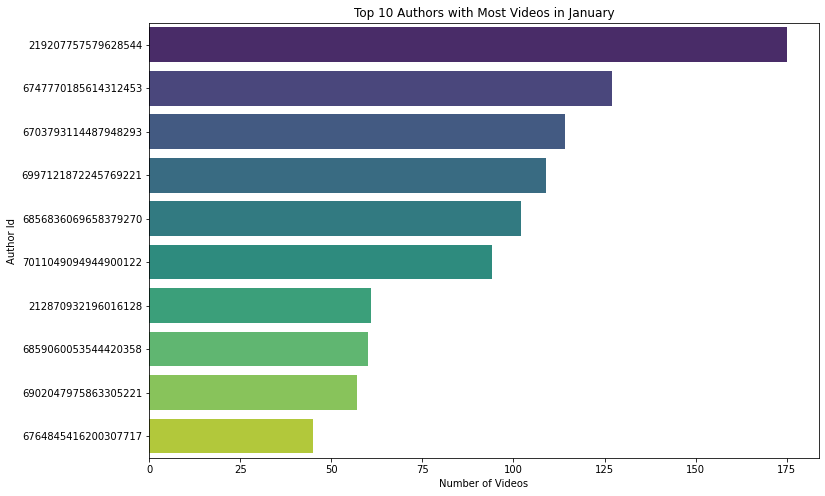

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the dataframe by videoId count
df_sorted = df_jan_video_count.sort_values('videoId', ascending=False)

# Take top 10 authors with most videos for better visualization
df_top10 = df_sorted.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='videoId', y='authorId', data=df_top10, palette='viridis')

plt.xlabel('Number of Videos')
plt.ylabel('Author Id')
plt.title('Top 10 Authors with Most Videos in January')

plt.show()


In [48]:
#select necessary columns in April table

df_apr_video = df_apr[
    ['authorId',
     'commentCount',
     'dateTime',
     'desc',
     'diggCount',
     'duetEnabled',
     'duetFromId',
     'hashtagId',
     'hashtagName',
     'musicAlbum',
     'musicAuthorName',
     'musicId',
     'musicPlayUrl',
     'musicTitle',
     'playCount',
     'shareCount',
     'stickerText',
     'stickerType',
     'videoId',
     'videoLink']].copy()

# Calculate the sum of 'videoId' for each unique 'authorId'
df_apr_video_count = df_apr_video.groupby('authorId')['videoId'].count().reset_index()

# Get the unique 'videoId' rows from df_apr_video
df_apr_video_unique = df_apr_video.drop_duplicates(subset='videoId')

print('Number of unique video contributions:', len(df_apr_video_unique))

#Save to CSV file
df_apr_video_unique.to_csv('Video_df_apr.csv', index=False)

Number of unique video contributions: 6462


In [124]:
video_desc = df_sep.loc[df_apr['id'] == '7069342650687606022', 'desc'].values[0]

print(video_desc)


We’ve been telling u bestie! 👀 #workfromanywhere #digitalnomadlife #remotejobsearch #remoteworker #linkedinhack


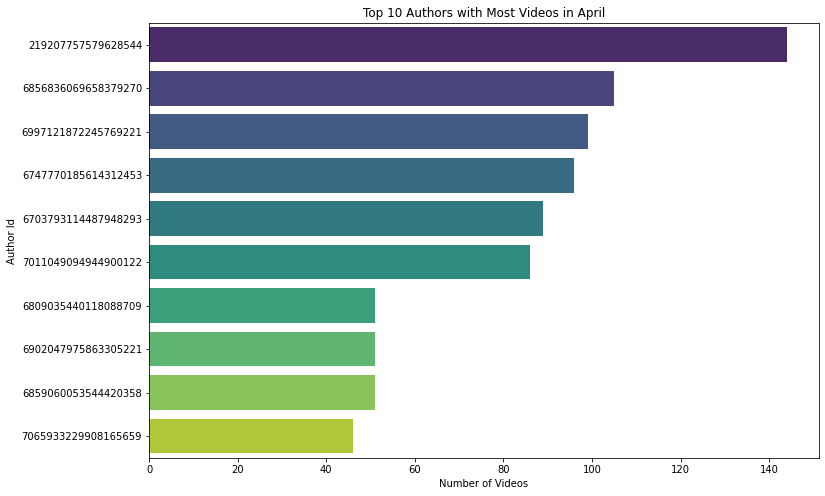

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the dataframe by videoId count
df_sorted = df_apr_video_count.sort_values('videoId', ascending=False)

# Take top 10 authors with most videos for better visualization
df_top10 = df_sorted.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='videoId', y='authorId', data=df_top10, palette='viridis')

plt.xlabel('Number of Videos')
plt.ylabel('Author Id')
plt.title('Top 10 Authors with Most Videos in April')

plt.show()
